## ***Import Required Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ***Loading IMDB DataSet***

In [ ]:
data = pd.read_csv(r"/content/imdb_data.csv")

##***Exploring Data***

In [ ]:
#dataset preview
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
#get information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
#Statistical Summary of Numerical Columns
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [ ]:
#Counting Non-Null Values for each column
data.count()

Poster_Link      1000
Series_Title     1000
Released_Year    1000
Certificate       899
Runtime          1000
Genre            1000
IMDB_Rating      1000
Overview         1000
Meta_score        843
Director         1000
Star1            1000
Star2            1000
Star3            1000
Star4            1000
No_of_Votes      1000
Gross             831
dtype: int64

In [ ]:
#Checking Data Types of Each Column
pd.DataFrame(data.dtypes,columns = ["data type"])

,data type
Poster_Link,object
Series_Title,object
Released_Year,object
Certificate,object
Runtime,object
Genre,object
IMDB_Rating,float64
Overview,object
Meta_score,float64
Director,object


In [ ]:
#Data of Numeric columns
data.select_dtypes(exclude=["bool",'object'])

,IMDB_Rating,Meta_score,No_of_Votes
0,9.3,80.0,2343110
1,9.2,100.0,1620367
2,9.0,84.0,2303232
3,9.0,90.0,1129952
4,9.0,96.0,689845
...,...,...,...
995,7.6,76.0,166544
996,7.6,84.0,34075
997,7.6,85.0,43374
998,7.6,78.0,26471


## ***Handling Missing Values in "Certificate" "meta_score" and "Gross" Columns***

In [ ]:
mode_certificate = data['Certificate'].mode()[0]
data['Certificate'].fillna(value=mode_certificate, inplace=True)

data['Meta_score'].fillna(value=data['Meta_score'].mean(),inplace=True)

mode_Gross = data['Gross'].mode()[0]
data['Gross'].fillna(value=mode_Gross, inplace=True)

In [ ]:
data.count()

Poster_Link      1000
Series_Title     1000
Released_Year    1000
Certificate      1000
Runtime          1000
Genre            1000
IMDB_Rating      1000
Overview         1000
Meta_score       1000
Director         1000
Star1            1000
Star2            1000
Star3            1000
Star4            1000
No_of_Votes      1000
Gross            1000
dtype: int64

## ***Performing data analysis and visualization***

***Rating Distribution***

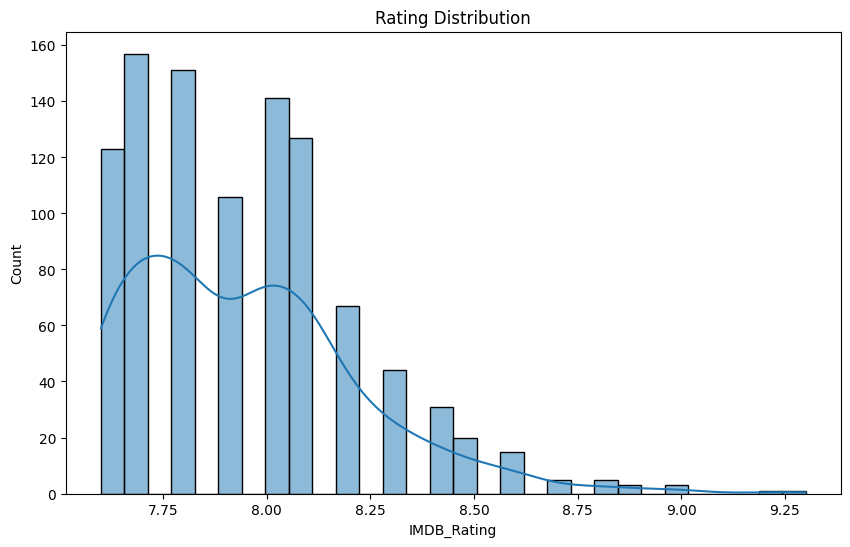

In [ ]:
#Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['IMDB_Rating'], bins=30, kde=True)
plt.title('Rating Distribution')
plt.xlabel('IMDB_Rating')
plt.ylabel('Count')
plt.show()

***Top directors with most movies***

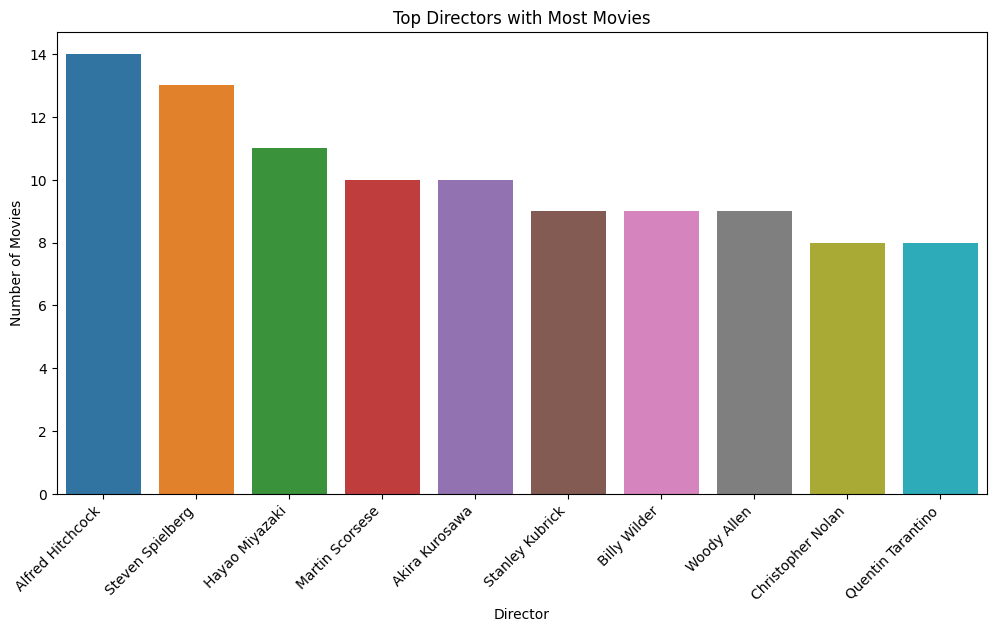

In [ ]:
#Top directors with most movies
top_directors = data['Director'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top Directors with Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

***Top 10 Movies with the Highest Ratings***

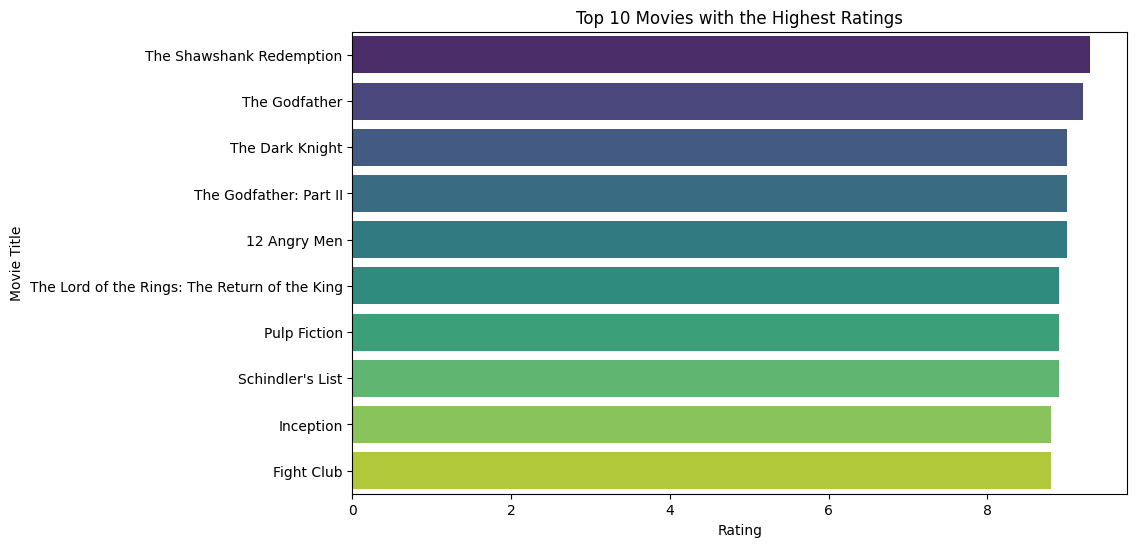

In [ ]:
top_movies = data.nlargest(10, 'IMDB_Rating')
plt.figure(figsize=(10, 6))
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_movies, palette='viridis')
plt.title('Top 10 Movies with the Highest Ratings')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()


**Correlation between rating and Gross**

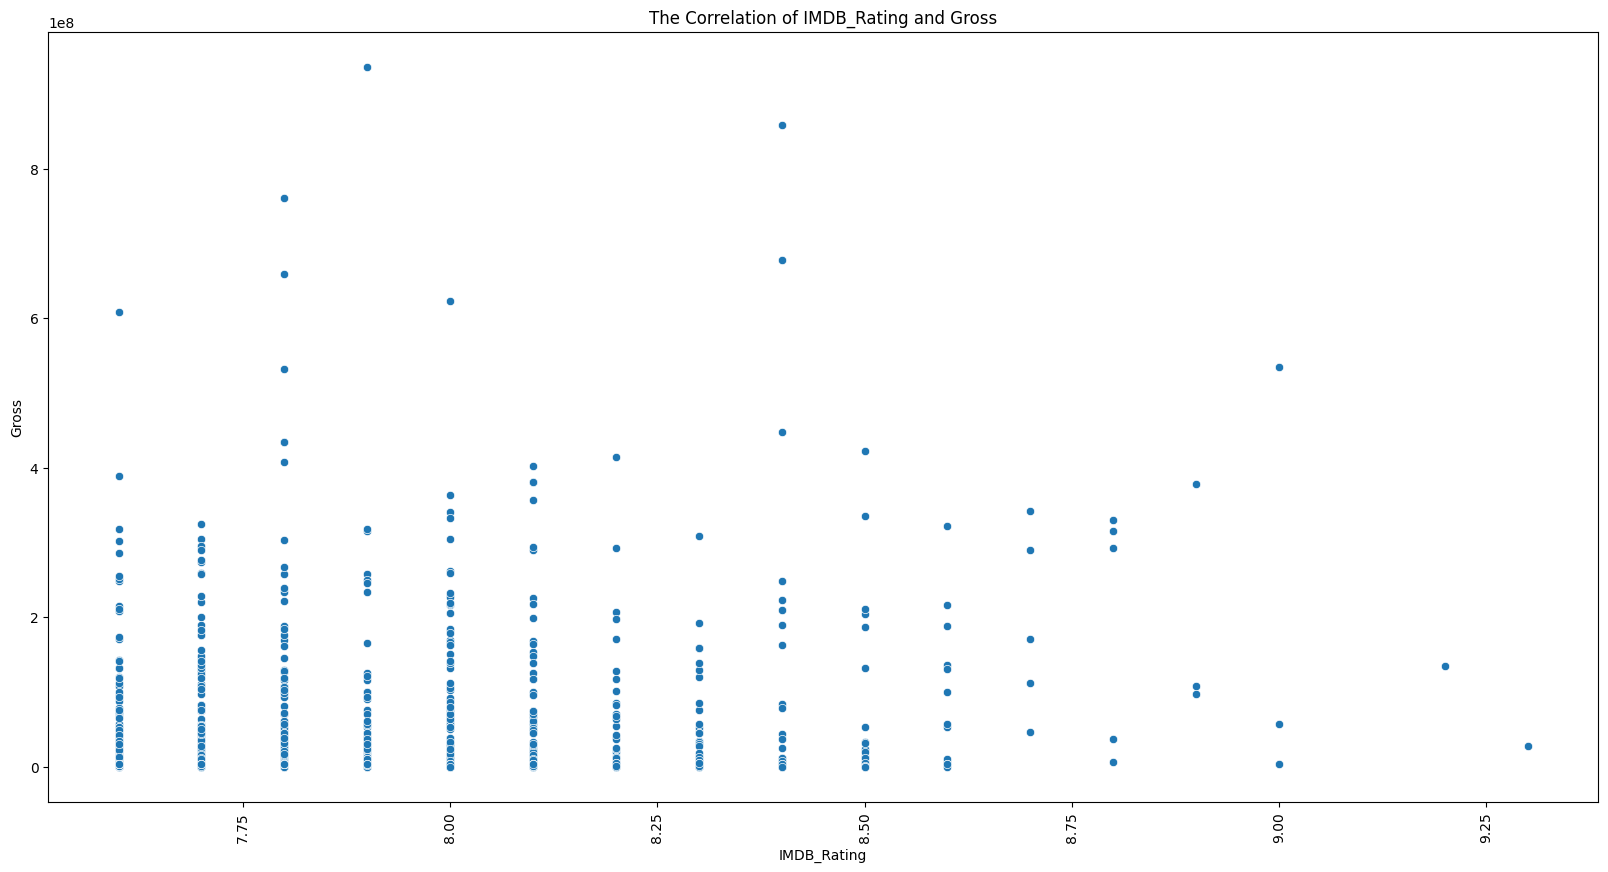

In [ ]:
fig,ax = plt.subplots(figsize = (20,10))
plt.title("The Correlation of IMDB_Rating and Gross")
sns.scatterplot(x = 'IMDB_Rating', y = 'Gross',data = data,ax=ax)
plt.xticks(rotation = 'vertical')
plt.show()

**Top 10 Highest Grossing Movies**

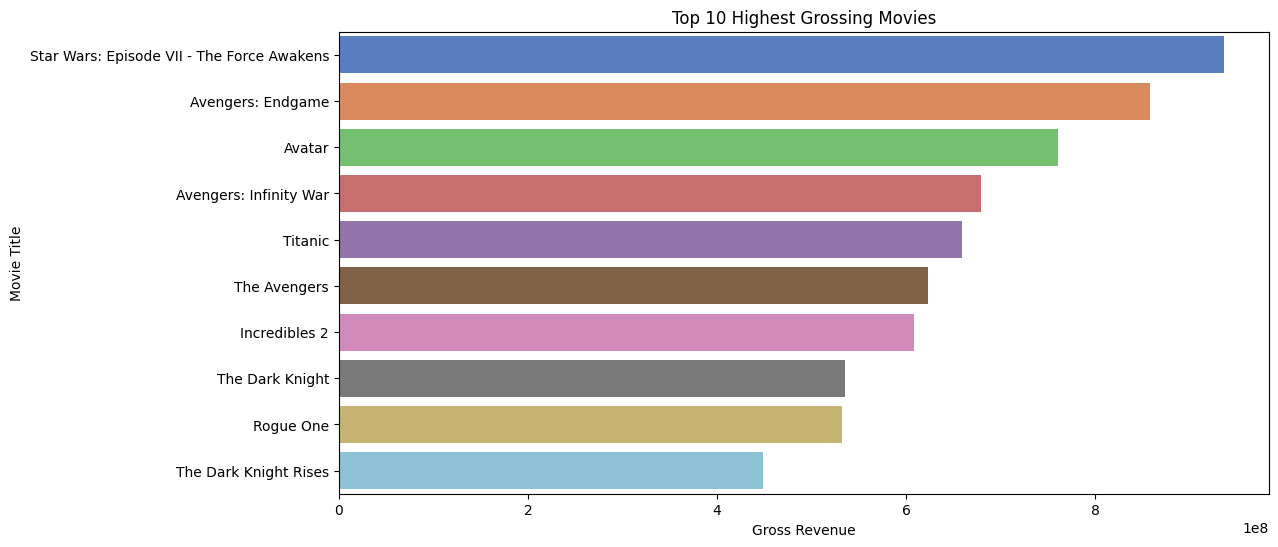

In [ ]:
top_grossing_movies = data.nlargest(10, 'Gross')
plt.figure(figsize=(12, 6))
sns.barplot(x='Gross', y='Series_Title', data=top_grossing_movies, palette='muted')
plt.title('Top 10 Highest Grossing Movies')
plt.xlabel('Gross Revenue')
plt.ylabel('Movie Title')
plt.show()


***Movie Gross Revenue by Genre***

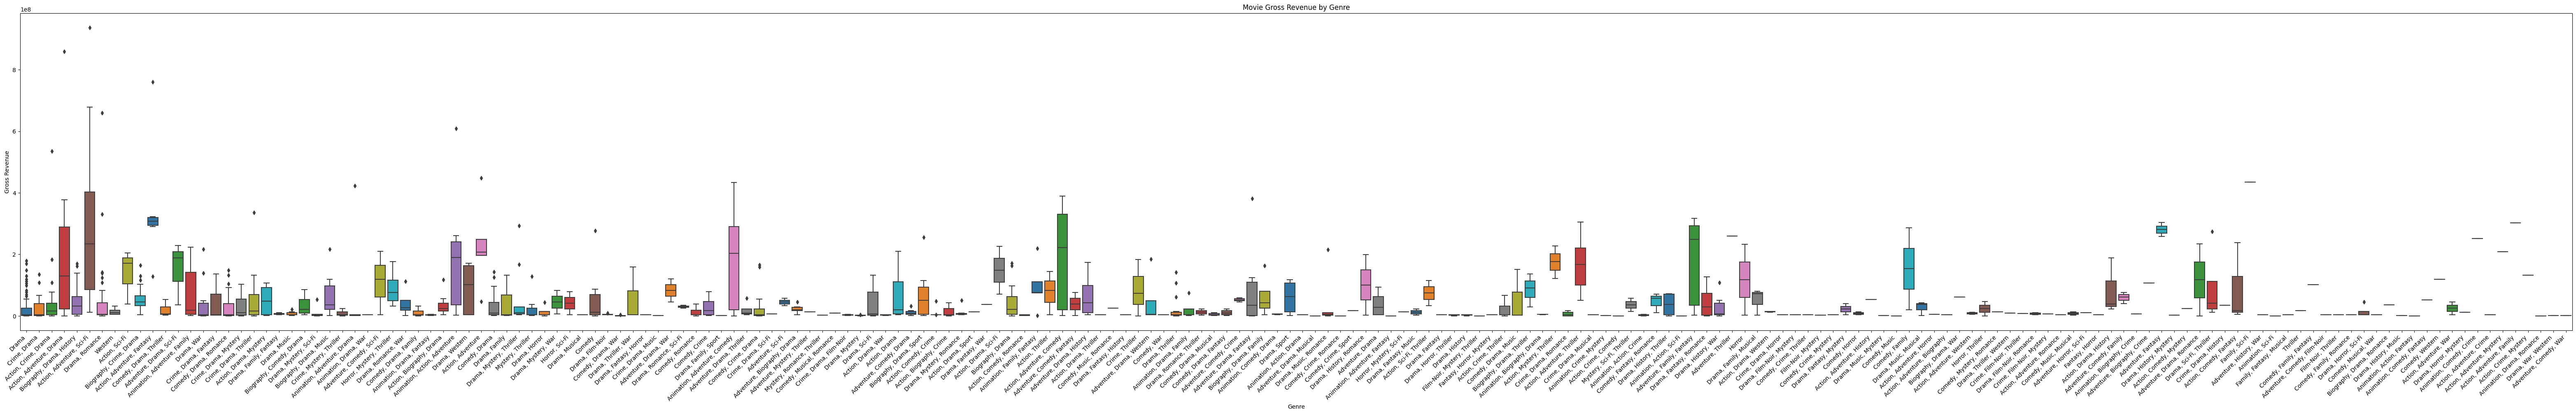

In [ ]:
plt.figure(figsize=(80,10))
sns.boxplot(x='Genre', y='Gross', data=data, palette='tab10')
plt.title('Movie Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()